In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
types = {'id': int, 'titulo': str, 'descripcion': str, 'tipodepropiedad': str, 'direccion': str,
        'ciudad': str, 'provincia': str, 'antiguedad': np.float32, 'habitaciones': np.float32,
        'garages':np.float32, 'idzona': np.float32, 'lat': np.float32, 'lng': np.float32,
        'gimnasio': bool, 'usosmultiples': bool, 'piscina': bool, 'escuelascercanas':bool,
        'centroscomercialescercanos':bool, 'precio':int}
data = pd.read_csv('../../data/train.csv', dtype = types)

data.head(2)

,id,titulo,descripcion,tipodepropiedad,direccion,ciudad,provincia,antiguedad,habitaciones,garages,...,idzona,lat,lng,fecha,gimnasio,usosmultiples,piscina,escuelascercanas,centroscomercialescercanos,precio
0,254099,depto. tipo a-402,"depto. interior de 80.15m2, consta de sala com...",Apartamento,Avenida Division del Norte 2005,Benito Juárez,Distrito Federal,NaN,2.0,1.0,...,23533.0,NaN,NaN,2015-08-23 00:00:00,False,False,False,False,False,2273000
1,53461,condominio horizontal en venta,"<p>entre sonora y guerrero, atr&aacute;s del h...",Casa en condominio,AV. MEXICO,La Magdalena Contreras,Distrito Federal,10.0,3.0,2.0,...,24514.0,19.310204,-99.227654,2013-06-28 00:00:00,False,False,False,True,True,3600000


In [3]:
data.dropna(subset={'precio','ciudad','tipodepropiedad'},inplace=True)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239600 entries, 0 to 239999
Data columns (total 23 columns):
id                            239600 non-null int32
titulo                        234218 non-null object
descripcion                   238025 non-null object
tipodepropiedad               239600 non-null object
direccion                     186785 non-null object
ciudad                        239600 non-null object
provincia                     239600 non-null object
antiguedad                    196272 non-null float32
habitaciones                  217185 non-null float32
garages                       201991 non-null float32
banos                         213510 non-null float64
metroscubiertos               222259 non-null float64
metrostotales                 188239 non-null float64
idzona                        211375 non-null float32
lat                           116341 non-null float32
lng                           116341 non-null float32
fecha                         239

In [5]:
data['sum'] = 1

In [6]:
data.loc[data.precio>10000000, 'rango_precio'] = '+10000000'
data.loc[((data.precio>9000000) & (data.precio<10000001)), 'rango_precio'] = '9000000-10000000'
data.loc[((data.precio>8000000) & (data.precio<9000001)), 'rango_precio'] = '8000000-9000000'
data.loc[((data.precio>7000000) & (data.precio<8000001)), 'rango_precio'] = '7000000-8000000'
data.loc[((data.precio>6000000) & (data.precio<7000001)), 'rango_precio'] = '6000000-7000000'
data.loc[((data.precio>5000000) & (data.precio<6000001)), 'rango_precio'] = '5000000-6000000'
data.loc[((data.precio>4000000) & (data.precio<5000001)), 'rango_precio'] = '4000000-5000000'
data.loc[((data.precio>3000000) & (data.precio<4000001)), 'rango_precio'] = '3000000-4000000'
data.loc[((data.precio>2000000) & (data.precio<3000001)), 'rango_precio'] = '2000000-3000000'
data.loc[((data.precio>1000000) & (data.precio<2000001)), 'rango_precio'] = '1000000-2000000'
data.loc[((data.precio<1000001)), 'rango_precio'] = '-1000000'

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 239600 entries, 0 to 239999
Data columns (total 25 columns):
id                            239600 non-null int32
titulo                        234218 non-null object
descripcion                   238025 non-null object
tipodepropiedad               239600 non-null object
direccion                     186785 non-null object
ciudad                        239600 non-null object
provincia                     239600 non-null object
antiguedad                    196272 non-null float32
habitaciones                  217185 non-null float32
garages                       201991 non-null float32
banos                         213510 non-null float64
metroscubiertos               222259 non-null float64
metrostotales                 188239 non-null float64
idzona                        211375 non-null float32
lat                           116341 non-null float32
lng                           116341 non-null float32
fecha                         239

In [8]:
precio_vs_tipo = data.groupby(['rango_precio','tipodepropiedad']).agg({'sum':'sum'}).unstack()
precio_vs_tipo.columns = precio_vs_tipo.columns.droplevel()

In [9]:
new_idx = ['-1000000','1000000-2000000','2000000-3000000','3000000-4000000','4000000-5000000','5000000-6000000','6000000-7000000','7000000-8000000','8000000-9000000','9000000-10000000','+10000000']
precio_vs_tipo = precio_vs_tipo.reindex(new_idx)

precio_vs_tipo = precio_vs_tipo.applymap(lambda x: np.log(x))

Text(114.0, 0.5, 'Rango de precio')

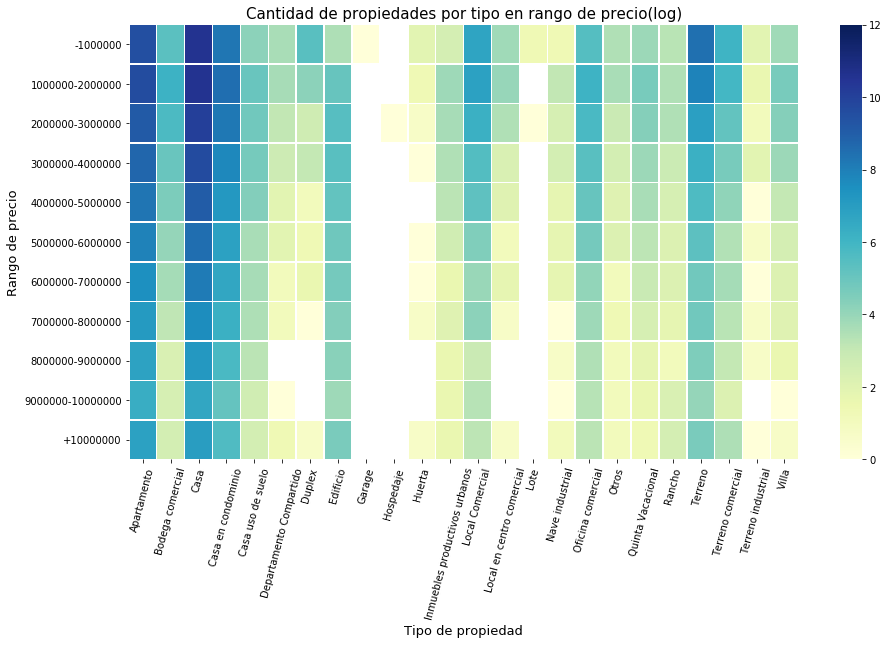

In [22]:
plt.figure(figsize=(15,8))
g = sns.heatmap(precio_vs_tipo, vmin = 0, vmax=12, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Cantidad de propiedades por tipo en rango de precio(log)", fontsize=15)
g.set_xlabel("Tipo de propiedad", fontsize=13)
g.set_ylabel("Rango de precio", fontsize=13)

In [16]:
ciudades = (data.ciudad.value_counts()>2500)
ciudades = (ciudades[ciudades==True]).index

data_ciudad = data.loc[data.ciudad.isin(ciudades)]

In [17]:
precio_vs_ciudad = data_ciudad.groupby(['rango_precio','ciudad']).agg({'sum':'sum'}).unstack()

In [18]:
new_idx = ['-1000000','1000000-2000000','2000000-3000000','3000000-4000000','4000000-5000000','5000000-6000000','6000000-7000000','7000000-8000000','8000000-9000000','9000000-10000000','+10000000']
precio_vs_ciudad = precio_vs_ciudad.reindex(new_idx)
precio_vs_ciudad = precio_vs_ciudad.applymap(lambda x: np.log(x))
precio_vs_ciudad.columns = precio_vs_ciudad.columns.droplevel()

Text(114.0, 0.5, 'Rango de precio')

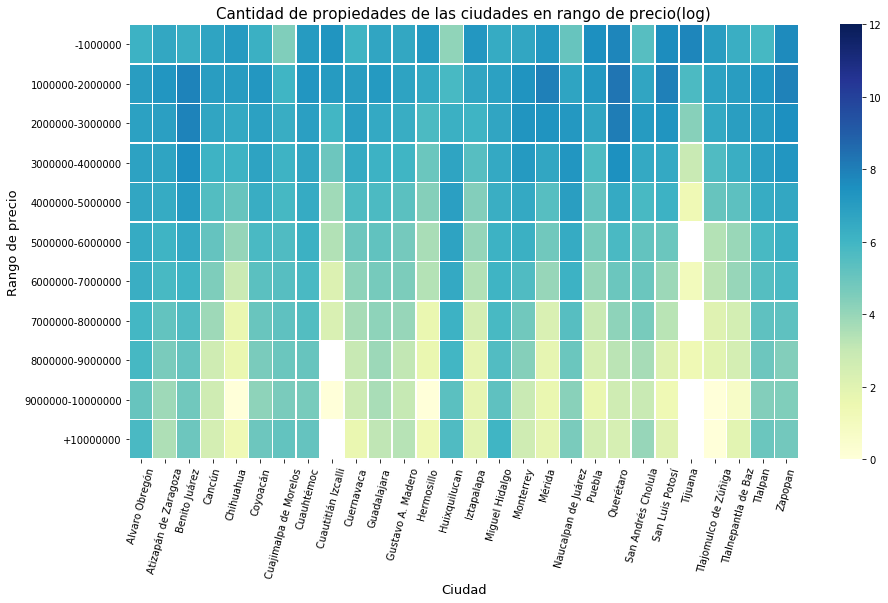

In [23]:
plt.figure(figsize=(15,8))
g = sns.heatmap(precio_vs_ciudad, vmin = 0, vmax=12, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Cantidad de propiedades de las ciudades en rango de precio(log)", fontsize=15)
g.set_xlabel("Ciudad", fontsize=13)
g.set_ylabel("Rango de precio", fontsize=13)

In [109]:
data_amen = data[['rango_precio','gimnasio','usosmultiples','piscina','escuelascercanas','centroscomercialescercanos']]
precio_amen = data_amen.groupby('rango_precio').agg({'gimnasio':'sum','usosmultiples':'sum','piscina':'sum'})
precio_amen = precio_amen.reindex(new_idx)
precio_amen = precio_amen

Text(69.0, 0.5, 'Utilidad')

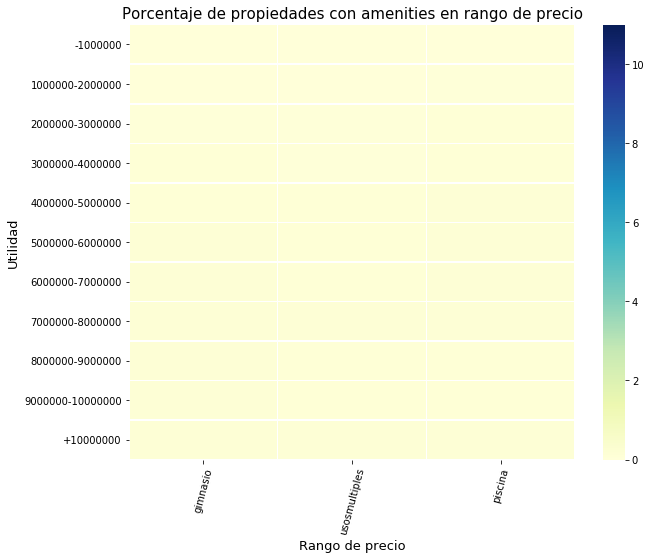

In [110]:
plt.figure(figsize=(10,8))
g = sns.heatmap(precio_amen, vmin = 0, vmax=3, cmap= "YlGnBu", linewidths=.5)
plt.xticks(rotation=75)
g.set_title("Porcentaje de propiedades con amenities en rango de precio", fontsize=15)
g.set_xlabel("Rango de precio", fontsize=13)
g.set_ylabel("Utilidad", fontsize=13)